In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import ast
import re
from datetime import datetime
from collections import Counter

In [2]:
#загрузим файл с данными в переменную df
df = pd.read_csv('main_task_new.csv', encoding = 'UTF-8')

Определим необходимые для работы функции 

In [3]:
#Найдем пропущенные значения
def missing_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * mis_val / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("В таблице " + str(df.shape[1]) + " столбцов.\n"      
            "из них " + str(mis_val_table_ren_columns.shape[0]) +
              " столбца имеют пропущенные значения.")
        return mis_val_table_ren_columns

In [4]:

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='Rating', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [5]:
def get_first_substring(x):
    if (x!=None and x!=np.nan):
        return x.split(',')[0]

In [6]:
def find_item(cell):
    if item in cell:
        return 1
    return 0


Посмотрим, какие значения содержат столбцы

0 - Restaurant_id

In [7]:
df['Restaurant_id'].nunique()

11909

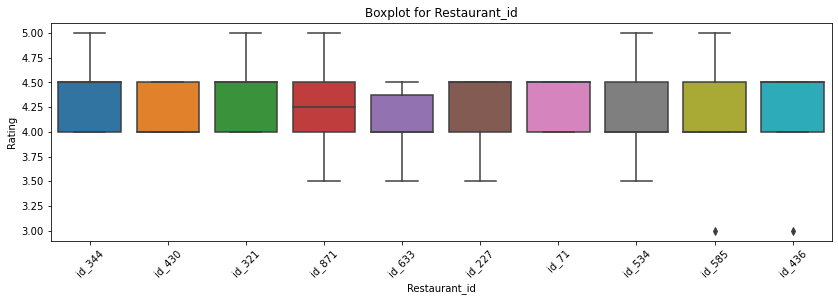

In [8]:
for col in ['Restaurant_id']:
    get_boxplot(col)

In [9]:
# Удалим нечисловые знаки
df['Restaurant_id'] = df['Restaurant_id'].str.replace(r'\D','')

In [19]:
# Преобразуем в числовой вид 

df['Restaurant_id'] = pd.to_numeric(df['Restaurant_id'])

1 - City

In [10]:
df['City'].nunique()

31

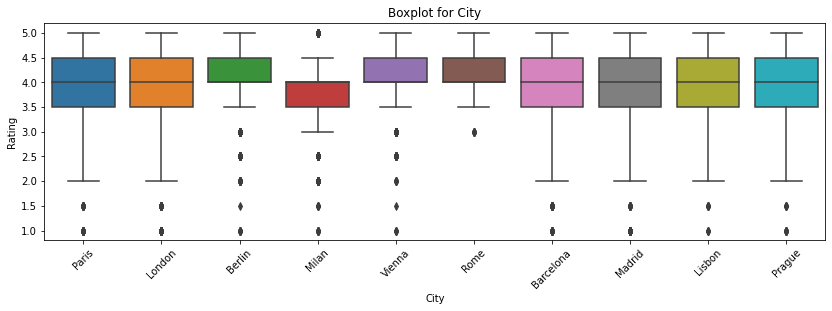

In [11]:
for col in ['City']:
    get_boxplot(col)

2 - Cuisine Style

In [12]:
# удалим лишние знаки

df['Cuisine Style'] = df['Cuisine Style'].str.replace(r"['\[\]\ ]",'')

In [13]:
# заполним пустые ячейки значением other

df['Cuisine Style'] = df['Cuisine Style'].fillna('other')

In [24]:
# разобьем строки

df['Cuisine Style'] = df['Cuisine Style'].str.split(',')

In [25]:
# преобразуем датафрейм в словарь

dictionary = df.to_dict('records')

In [26]:
# создадим список уникальных названий кухонь

kitchens = set()
for i in dictionary:
    for j in i['Cuisine Style']:
        kitchens.add(j)

In [27]:
# создадим столбцы для каждого вида кухни

for item in kitchens:
    df[item] = df['Cuisine Style'].apply(find_item)

In [28]:
# заменим значение на кол-во кухонь

df['Cuisine Style'] = df['Cuisine Style'].apply(lambda x: len(x))

3 - Ranking

In [ ]:
df['Ranking'].value_counts()

4 - Rating

In [11]:
df['Rating'].value_counts()

5 - Price Range

In [13]:
df['Price Range'].value_counts()

In [14]:
# переименуем значения

df['Price Range'] = df['Price Range'].replace('$$ - $$$','median')
df['Price Range'] = df['Price Range'].replace('$','low')
df['Price Range'] = df['Price Range'].replace('$$$$','high')

In [ ]:
#заменим отсутствующее значение

df['Price Range'] = df['Price Range'].fillna('unknown')

In [ ]:
df['Price Range'].value_counts()

In [ ]:
for col in ['Price Range']:
    get_boxplot(col)

6 - Number of Reviews

In [ ]:
df['Number of Reviews'].value_counts()

In [ ]:
# Заполним пропущенные значения в Number of Reviews средними значениями

df['Number of Reviews'] = df['Number of Reviews'].fillna(df['Number of Reviews'].mean())

In [ ]:
# добавим показатель рейтинга на 1 отзыв

df['rating_per_one_review'] = df['Rating'] / df['Number of Reviews']

In [ ]:
# добавим кол-во отзывов на 1го жителя

df['reviews_per_citizen'] = df['geonameid'] / df['Number of Reviews']

In [ ]:

df.drop(['geonameid'], axis='columns', inplace=True)

In [ ]:
df.drop(['country'], axis='columns', inplace=True)

7 - Reviews

In [ ]:
# создадим новые столбцы с датами отзывов

df['older_review'] = df['Reviews'].str.extract(r'(\d{2}/\d{2}/\d{4})')
df['earlier_review'] = df['Reviews'].str.extract(r'(\,\ \'\d{2}/\d{2}/\d{4})')

In [ ]:
# удалим лишние символы из столбца

df['earlier_review'] = df['earlier_review'].str.replace(r'\,\ \'','')

In [ ]:
# заполним пустые ячейки значением nan

df[['older_review', 'earlier_review']] = df[['older_review', 'earlier_review']].fillna(-1)

In [ ]:
# преобразуем в unixtime

df['older_review'] = pd.to_datetime(df['older_review']).astype('int64')
df['earlier_review'] = pd.to_datetime(df['earlier_review']).astype('int64')

In [ ]:
# создадим новый столбец с разницей между более новыми и старыми отзывами

df['time_between_review'] = df['older_review'] - df['earlier_review']

8 - URL_TA

In [ ]:
# Удалим нечисловые знаки из строк

df['ID_TA'] = df['ID_TA'].str.replace(r'\D','')

In [ ]:
# приведем значения к int
df['ID_TA'] = pd.to_numeric(df['ID_TA'])

In [ ]:
df['ID_TA'].nunique()

In [ ]:
# Столбцы `URL_TA`, `ID_TA` фактически дублируют друг друга, Удалим один из них

df.drop(['URL_TA'], axis='columns', inplace=True)

In [ ]:
df.drop(['Reviews'], axis='columns', inplace=True)

Пропущенные значения

In [ ]:
# Посмотрим кол-во пропущенных значений
missing_values(df)

пропущенных значений нет

In [ ]:
# обратим внимание на корреляции
df.corr(method='pearson')

Преобразуем в dummy - переменные "текстовые" столбцы

City

In [ ]:
df['City'].nunique()

In [ ]:
city_dummies = pd.get_dummies(df['City'], drop_first=True)

In [ ]:
df = pd.concat([df, city_dummies], axis=1)

In [ ]:
df.drop(['City'], axis='columns', inplace=True)

Price Range

In [ ]:

df['Price Range'].value_counts()

In [ ]:

price_dummies = pd.get_dummies(df['Price Range'], drop_first=False)

In [ ]:
df = pd.concat([df, price_dummies], axis=1)

In [ ]:
df.drop(['Price Range'], axis='columns', inplace=True)

Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [ ]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Restaurant_id', 'Rating'], axis = 1)
y = df['Rating']

In [ ]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [ ]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Создаём, обучаем и тестируем модель

In [ ]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [ ]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [ ]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))